In [2]:
# Authored by KT 30.11.2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/theofil/I2TheTerascale/blob/main/code/python/readCSVdemo.ipynb)

In [3]:
# read comma seperated values from remote file
df = pd.read_csv('https://theofil.web.cern.ch/theofil/cmsod/files/CSVs/ttbar.csv')

In [4]:
# show me the df contents
df

,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,triggerIsoMu24,NMuon
0,-47.4,13.4,34.9,15,False,0
1,0.0,0.0,0.0,0,False,0
2,-11.6,-32.6,-263.4,-13,False,0
3,0.0,0.0,0.0,0,False,1
4,-49.4,-30.7,57.6,11,False,0
...,...,...,...,...,...,...
36936,-43.0,40.3,-78.6,-13,True,1
36937,0.0,0.0,0.0,0,False,0
36938,0.0,0.0,0.0,0,False,0
36939,38.1,4.3,-61.9,15,False,0


In [6]:
# calculate a new variable and name it as MClepton_pt
df['MClepton_pt'] = (df['MClepton_px']**2 + df['MClepton_py']**2)**0.5
df

,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,triggerIsoMu24,NMuon,MClepton_pt
0,-47.4,13.4,34.9,15,False,0,49.257690
1,0.0,0.0,0.0,0,False,0,0.000000
2,-11.6,-32.6,-263.4,-13,False,0,34.602312
3,0.0,0.0,0.0,0,False,1,0.000000
4,-49.4,-30.7,57.6,11,False,0,58.162273
...,...,...,...,...,...,...,...
36936,-43.0,40.3,-78.6,-13,True,1,58.932928
36937,0.0,0.0,0.0,0,False,0,0.000000
36938,0.0,0.0,0.0,0,False,0,0.000000
36939,38.1,4.3,-61.9,15,False,0,38.341883


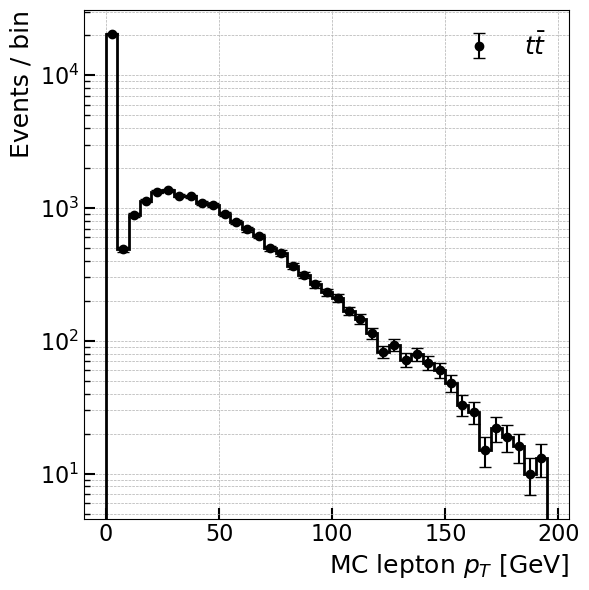

In [7]:
# Plot a variable, for example the MClepton_pt
data = df['MClepton_pt']

# Compute histogram
counts, bin_edges = np.histogram(data, bins=np.arange(0, 200, 5))

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute poisson errors
errors = np.sqrt(counts)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Add error bars with caps at the ends
ax.errorbar(bin_centers, counts, yerr=errors, fmt='o', color='black', capsize=4, capthick=1, label=r'$t\bar{t}$')
ax.hist(data, bins=bin_edges, histtype='step', linewidth=2, color='black')

ax.set_yscale('log')
ax.set_xlabel(r'MC lepton $p_T$ [GeV]', fontsize=18, loc='right')
ax.set_ylabel('Events / bin', fontsize=18, loc='top')

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=16, direction='in', length=8, width=1.5)
ax.tick_params(axis='both', which='minor', labelsize=12, direction='in', length=4, width=1.0)

# Set grid and legend
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
ax.legend(fontsize=18, loc='upper right', frameon=False)

# Set transparent background
fig.patch.set_alpha(0)  # Transparent figure background
ax.set_facecolor('none')  # Transparent axis background

# Add tight layout
plt.tight_layout()

# Show plot
plt.show()

In [11]:
# Examples of how to count after placing selection criteria (in other words 'cuts')
Ntot = len(df)                                # total number of events in ttar
NmuMinus = len(df[df.MCleptonPDGid == 13])     # total number of negative muons
print('Ntot = %d  NmuMinus = %d'%(Ntot, NmuMinus))
print('BR(ttbar -> 1mu- )  = ', NmuMinus/Ntot)

# finish the exercise by finding out how many ttbar events result 
# into semileptonic final states with positive muon
# and complete the BR calculation including uncertainties
# PDGId codes: https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf

Ntot = 36941  NmuMinus = 2687
BR(ttbar -> 1mu- )  =  0.07273760861914945


In [20]:
# find average MClepton_pt excluding events with MClepton_pt==0 and requiring MCleptonPDGid == 13
sel = (df.MClepton_pt != 0) & (df.MCleptonPDGid == 13)
df[sel]

,MClepton_px,MClepton_py,MClepton_pz,MCleptonPDGid,triggerIsoMu24,NMuon,MClepton_pt
16,43.5,-37.1,-30.8,13,True,1,57.172196
17,-36.4,-11.2,-42.6,13,False,0,38.084117
24,27.9,-2.6,-114.3,13,True,1,28.020885
44,-22.2,29.3,-35.4,13,False,0,36.760441
58,-77.8,49.7,-163.6,13,True,1,92.319716
...,...,...,...,...,...,...,...
36884,-10.4,25.2,-11.1,13,True,1,27.261695
36889,-6.6,60.9,46.8,13,False,1,61.256591
36897,146.7,22.6,36.0,13,True,1,148.430624
36910,-13.9,-23.7,94.2,13,False,1,27.475444


In [24]:
totPt = sum(df[sel]['MClepton_pt'])
Neve = len(df[sel])
print('Neve = %d totPt = %2.1f  <Pt> = %2.1f [GeV]'%(Neve, totPt, totPt/Neve))

Neve = 2687 totPt = 135345.0  <Pt> = 50.4 [GeV]
